In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use("fivethirtyeight")
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv("./dataset./heart_failure_clinical_records_dataset.csv")
df["sex"] = df["sex"].map({0: "Female", 1: "Male"})

In [205]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    object 
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(9), object(1)
memory usage: 30.5+ KB


In [8]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


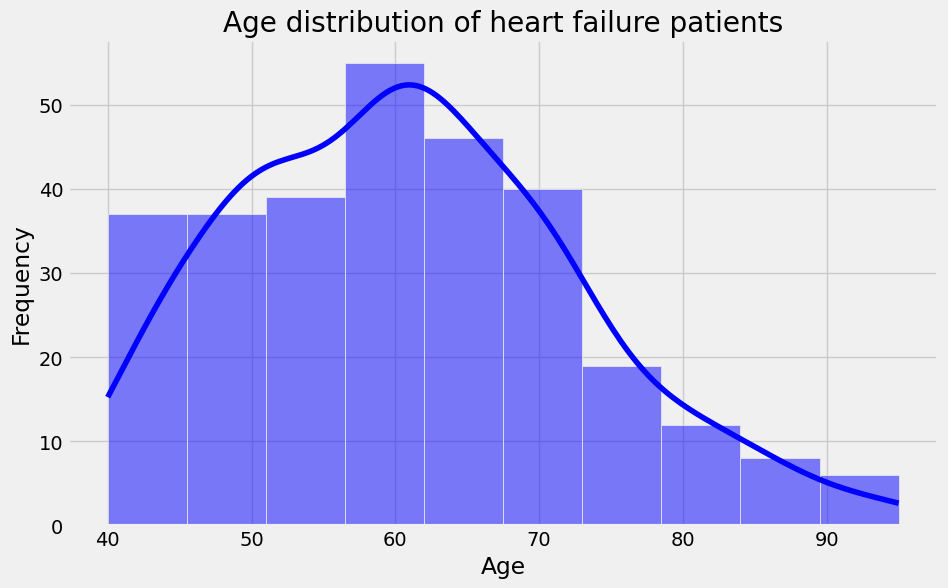

In [6]:
## 1 What is the distribution of age among heart failure patients in the dataset?
plt.figure(figsize=(10,6))
sns.histplot(df.age , kde= True, color= 'blue')
plt.title("Age distribution of heart failure patients")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

## Insights
# 1. Most of Heart Failure patients around 60 years old
# 2. Problems mainly start around age 40 years old
#


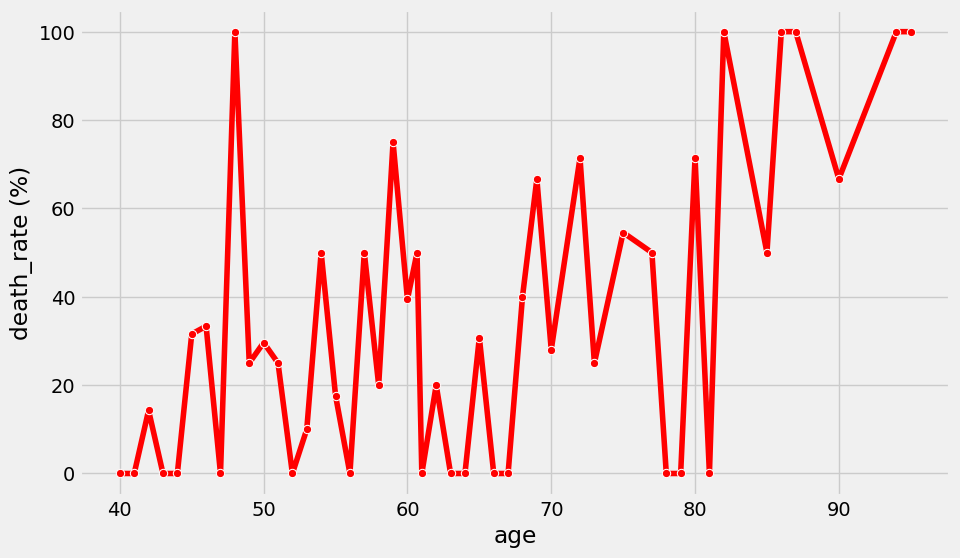

In [9]:
## 2 How does the death rate vary with age?
dr_df = df.groupby('age')["DEATH_EVENT"].sum().reset_index()
dr_df["death_count"] = df.groupby('age')["DEATH_EVENT"].size().reset_index()["DEATH_EVENT"]
dr_df['death_rate (%)'] = (dr_df["DEATH_EVENT"] / dr_df["death_count"]) * 100

plt.figure(figsize=(10,6))
sns.lineplot(x='age', y='death_rate (%)', data=dr_df, marker='o',  color="red")

#sns.barplot(x='age', y='death_rate (%)',data=dr_df)
plt.show()

## insights
#1. Overall deathrate increases by age and 100% after 80 years old
## 50 to 80 years old it is around 50%


The percentage of male and female is 64.88%, 35.12% repectively



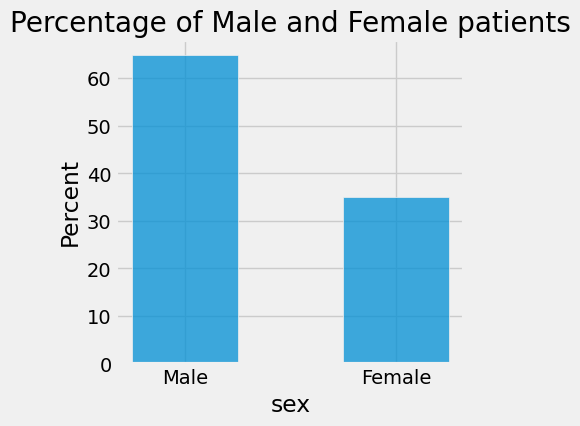

In [14]:
## 3. What is the percentage of male and female patients in the dataset?
data = df.sex.value_counts(normalize=True)*100
print(f"\nThe percentage of male and female is {data[0]:.2f}%, {data[1]:.2f}% repectively\n")
plt.figure(figsize=(4,4))
ax = sns.histplot(df.sex, stat='percent',multiple='dodge', shrink=0.5, palette='pastel' )

plt.title("Percentage of Male and Female patients")
plt.show()

## Insights
## The percentage of male and female is 64.88%, 35.12% repectively

Text(0.5, 1.0, 'Platelet Count by Age Group')

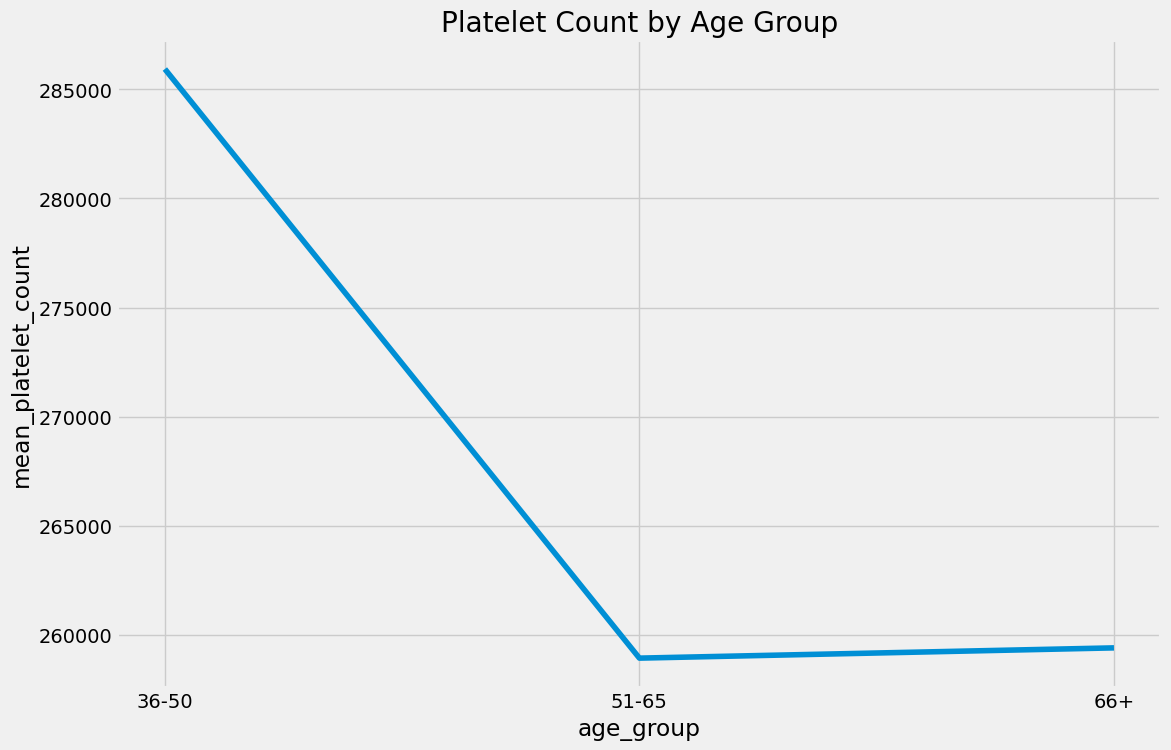

In [322]:
# 4. How does the platelet count vary among different age groups?
plt.figure(figsize=(12, 8))
df["age_group"] = pd.cut(df['age'], bins=[0, 18, 35, 50, 65, 100], labels=['0-18', '19-35', '36-50', '51-65', '66+'], right=False)
data = df.groupby("age_group")['platelets'].agg(['mean', 'median', 'std', 'count']).reset_index()
data.rename(columns={'mean': 'mean_platelet_count', 'median': 'median_platelet_count', 'std': 'std_dev_platelet_count'}, inplace=True)
#print(f"variation in platelets count by age group {data.mean_platelet_count:.2f}")
sns.lineplot(y="mean_platelet_count", x="age_group", data=data, palette='pastel')
plt.title('Platelet Count by Age Group')

##Insights
## Variation in platelets count is significant by age group

Variation in platelets count by age yearly 97804.24
variation in platelets count by age group 31493.21


Text(0.5, 1.0, 'Platelet Count variation by Age Group')

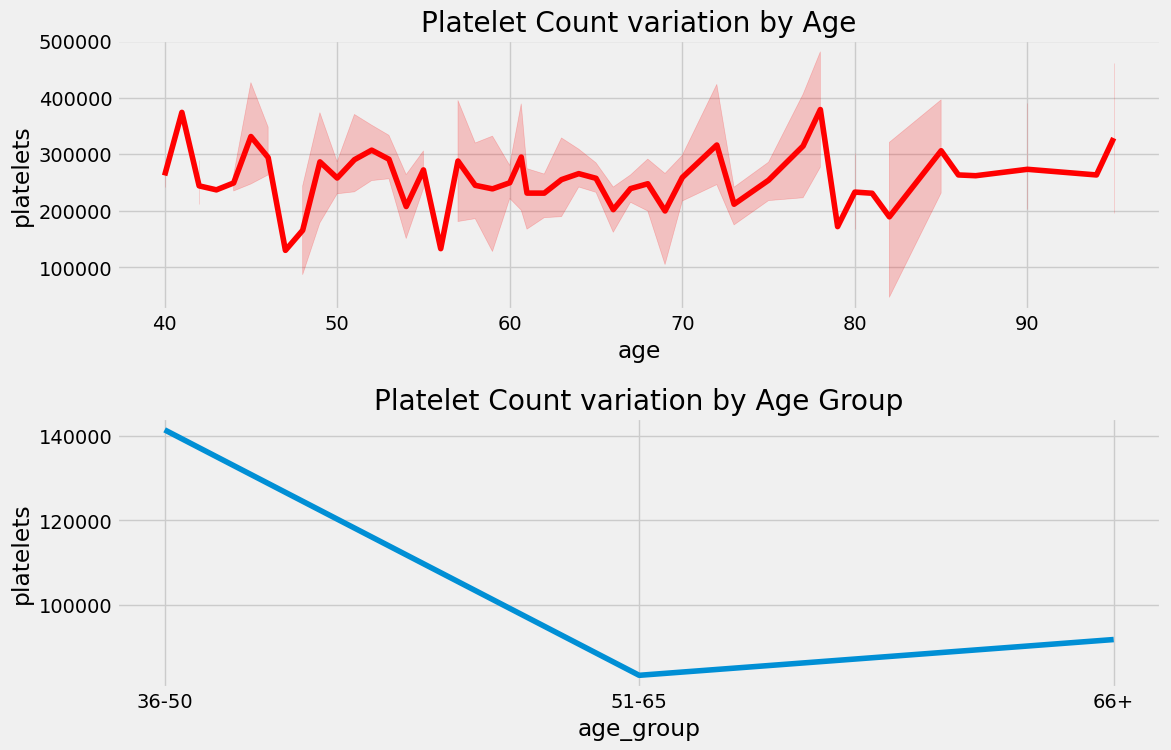

In [325]:
# 4. How does the platelet count vary among different age groups?

fig, axs = plt.subplots(2, 1, figsize=(12, 8), gridspec_kw={'hspace': 0.4, 'wspace': 0.4})
axs = axs.flatten()

print(f"Variation in platelets count by age yearly {df.platelets.std():.2f}")
#sns.barplot(y="platelets", x="age", data=df,  ax=axs[1])
sns.lineplot(y="platelets", x="age", data=df, ax=axs[0], color='red')
axs[0].set_title('Platelet Count variation by Age')

df["age_group"] = pd.cut(df['age'], bins=[0, 18, 35, 50, 65, 100], labels=['0-18', '19-35', '36-50', '51-65', '66+'], right=False)
data = df.groupby("age_group").std()
std_platelet = data.platelets.std()
print(f"variation in platelets count by age group {std_platelet:.2f}")
sns.lineplot(y="platelets", x=data.index, data=data, ax=axs[1])
axs[1].set_title('Platelet Count variation by Age Group')



there is no correlation between creatinine and sodium levels in the blood


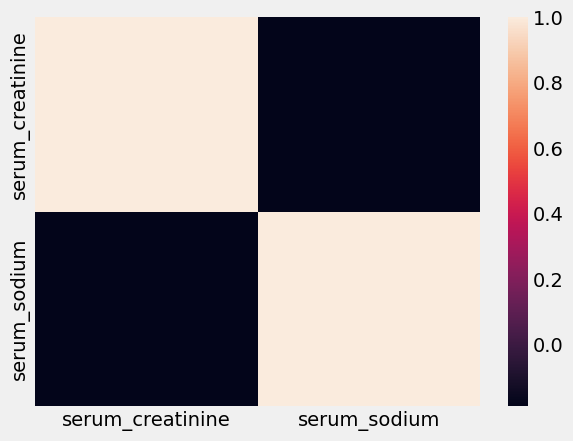

In [189]:

# 5. Is there a correlation between creatinine and sodium levels in the blood?
df_corr = df[["serum_creatinine", "serum_sodium"]].corr()
sns.heatmap(df_corr)
print("there is no correlation between creatinine and sodium levels in the blood")

## Insights
## there is no correlation between creatinine and sodium levels in the blood

<AxesSubplot:xlabel='sex', ylabel='prevalence(%)'>

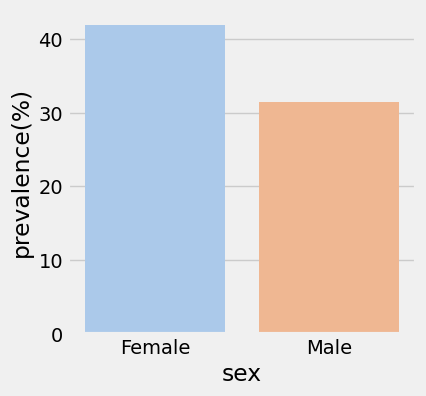

In [213]:

# 6. How does the prevalence of high blood pressure differ between male and female patients?
prevalence = df.groupby('sex')['high_blood_pressure'].mean().reset_index()
prevalence["prevalence(%)"] = prevalence['high_blood_pressure'] * 100
plt.figure(figsize=(4,4))
sns.barplot(x="sex", y='prevalence(%)', data=prevalence, palette='pastel')


## Insights of high blood pressure differ between male and female patients
## Female patients have higher High Blood Pressure symptoms than male patients


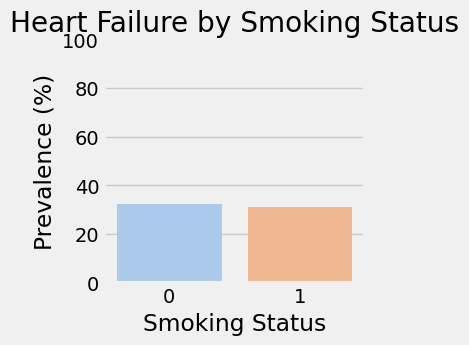

p-value: 0.9317652998235507 | A p-value less than 0.05 typically indicates a significant relationship


In [250]:
# 7. What is the relationship between smoking habits and the occurrence of heart failure?
prevalence = df.groupby("smoking")["DEATH_EVENT"].mean().reset_index()
prevalence["prevalence (%)"] = prevalence["DEATH_EVENT"]*100
plt.figure(figsize=(3, 3))
sns.barplot(x="smoking", y="prevalence (%)", data=prevalence, palette='pastel')
plt.title('Heart Failure by Smoking Status')
plt.xlabel('Smoking Status')
plt.ylabel('Prevalence (%)')
plt.ylim(0, 100)  # Adjust y-axis to 0-100% for better readability
plt.show()


contingency_table = pd.crosstab(df['smoking'], df['DEATH_EVENT'])
from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"p-value: {p} | A p-value less than 0.05 typically indicates a significant relationship")

## Insights
## Smoking habit have effect upto some extent but not significantly

In [271]:
df.groupby("age_group")["DEATH_EVENT"].count().reset_index()

,age_group,DEATH_EVENT
0,0-18,0
1,19-35,0
2,36-50,47
3,51-65,137
4,66+,115


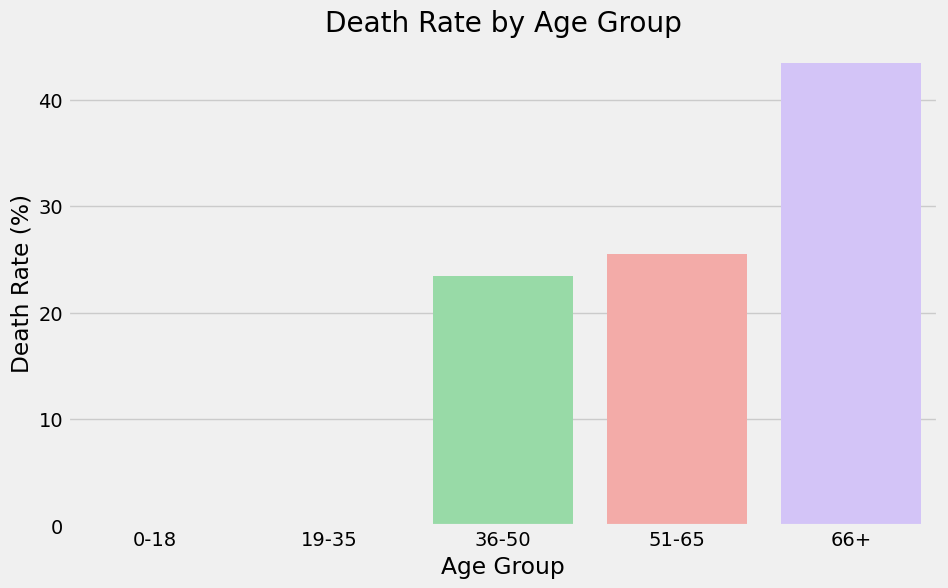

In [11]:
# 8. Are there any noticeable patterns in the distribution of death events across different age groups?
df["age_group"] = pd.cut(df['age'], bins=[0, 18, 35, 50, 65, 100], labels=['0-18', '19-35', '36-50', '51-65', '66+'], right=False)
df_de =df.groupby("age_group")["DEATH_EVENT"].sum().reset_index()
df_de["total_count"]=df.groupby("age_group")["DEATH_EVENT"].count().reset_index()["DEATH_EVENT"]
#death_count=("DEATH_EVENT", 'sum'), total_count=("DEATH_EVENT", 'size'))
df_de['death_rate (%)'] = (df_de["DEATH_EVENT"] / df_de["total_count"]) * 100
#sns.barplot(x="age_group", y="DEATH_EVENT", data=df_de, kde=True )
df_de.dropna(inplace=True)

# Bar plot of death rates
plt.figure(figsize=(10, 6))
sns.barplot(x='age_group', y='death_rate (%)',  data=df_de, palette='pastel')
plt.title('Death Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Death Rate (%)')
plt.show()

## insigths

## death rates is higher in older age groups

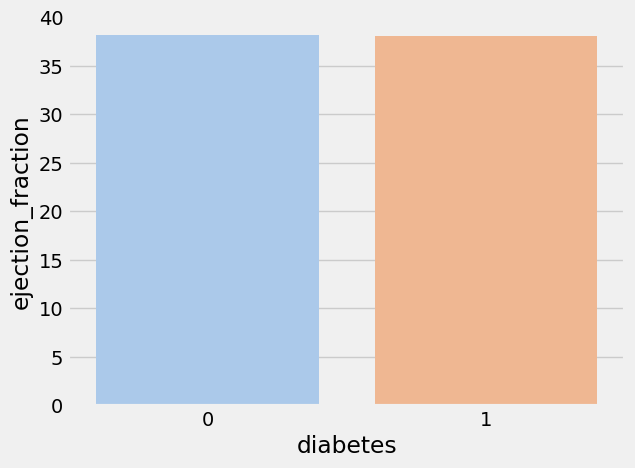

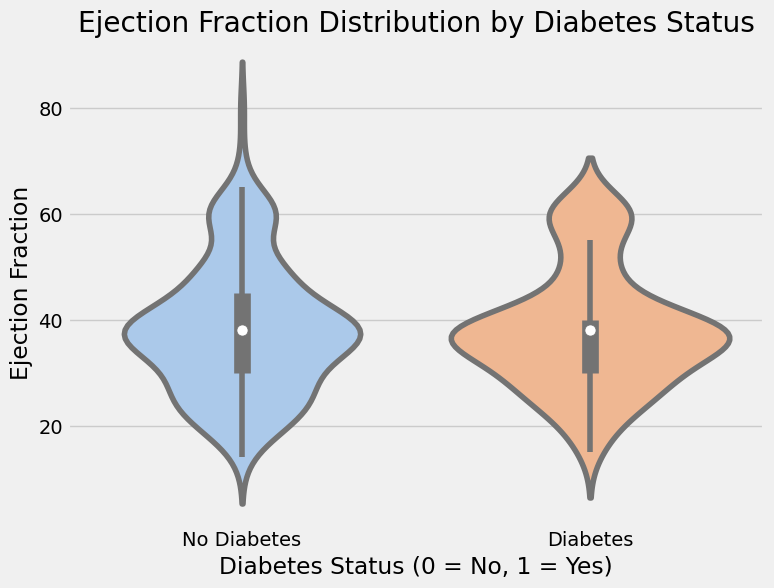

In [337]:
# 9. Is there any significant difference in ejection fraction between patients with and without diabetes?
data = df.groupby("diabetes")["ejection_fraction"].mean().reset_index()

sns.barplot( y="ejection_fraction", x= "diabetes",   data=data, palette='pastel')

plt.figure(figsize=(8, 6))
sns.violinplot(x='diabetes', y='ejection_fraction', data=df, palette='pastel')

# Customize the plot
plt.title('Ejection Fraction Distribution by Diabetes Status')
plt.xlabel('Diabetes Status (0 = No, 1 = Yes)')
plt.ylabel('Ejection Fraction')
plt.xticks([0, 1], ['No Diabetes', 'Diabetes'])
plt.show()

## insights
# the plots indicate that there is no significant difference between
# ejection fraction between patients with and without diabetes

In [348]:
# 9. Is there any significant difference in ejection fraction between patients with and without diabetes?
from scipy.stats import ttest_ind, mannwhitneyu
ef_no_diabetes = df[df['diabetes'] == 0]['ejection_fraction']
ef_diabetes = df[df['diabetes'] == 1]['ejection_fraction']

t_stat, p_value = ttest_ind(ef_no_diabetes, ef_diabetes)
print(f"T-statistic: {t_stat}, P-value: {p_value}")

# Alternatively, perform the Mann-Whitney U test if the data is not normally distributed
u_stat, p_value = mannwhitneyu(ef_no_diabetes, ef_diabetes)
print(f"U-statistic: {u_stat}, P-value: {p_value}")

## Insights analysis
#P-value higher than 0.05 indicate that there is no significant difference between
# ejection fraction between patients with and without diabetes

T-statistic: 0.08358970647234736, P-value: 0.9334389630426103
U-statistic: 11025.5, P-value: 0.8376930820736825


Text(0.5, 1.0, 'Serum creatinine level variation on survival status')

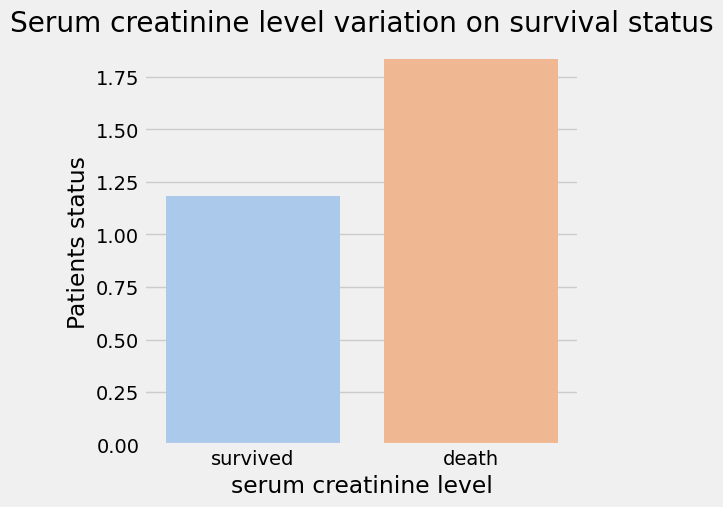

In [347]:
# 10. How does the serum creatinine level vary between patients who survived and those who did not?

data = df.groupby("DEATH_EVENT")["serum_creatinine"].mean().reset_index()
data['DEATH_EVENT'] = data['DEATH_EVENT'].map({0: "survived", 1: "death"})
plt.figure(figsize=(5,5))
sns.barplot(x="DEATH_EVENT", y="serum_creatinine", data=data, palette='pastel' )
plt.xlabel("serum creatinine level")
plt.ylabel("Patients status")
plt.title("Serum creatinine level variation on survival status")

##Insights
# patient with higher serum creatinine level did not survived.